Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
epoch: 0005 Avg.cost= 0.070333
epoch: 0010 Avg.cost= 0.037476
epoch: 0015 Avg.cost= 0.026135
epoch: 0020 Avg.cost= 0.018579
epoch: 0025 Avg.cost= 0.016418
epoch: 0030 Avg.cost= 0.015973
학습완료!
정확도: 0.9838
Label: [4]
prediction: [4]


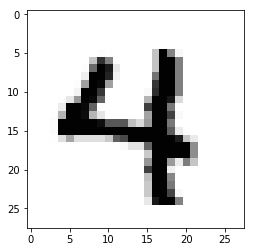

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#mnist 데이터 불러오기
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("./mnist/data/",one_hot=True)

##모델구성(dropout 적용)
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])
prob=tf.placeholder(tf.float32)

with tf.name_scope('layer1'):
    W1=tf.Variable (tf.random_normal([784,256],stddev=0.01))
    L1=tf.nn.relu(tf.matmul(X,W1))
    L1=tf.nn.dropout(L1,prob)
with tf.name_scope('layer2'):
    W2=tf.Variable (tf.random_normal([256,256],stddev=0.01))
    L2=tf.nn.relu(tf.matmul(L1,W2))
    L2=tf.nn.dropout(L2,prob)
with tf.name_scope('output'):
    W3=tf.Variable(tf.random_normal([256,10],stddev=0.01))
    model=tf.matmul(L2,W3)

with tf.name_scope('optimizer'):
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)

#신경망 모델 학습
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)

for epoch in range(30):
    total_cost=0
    
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        
        _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_ys,
                                                                    prob:0.8})
        total_cost += cost_val
    if(epoch%5==4):    
        print('epoch:','%04d'%(epoch+1),
                      'Avg.cost=','{:3f}'.format(total_cost/total_batch))

print("학습완료!")

is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
print('정확도:',sess.run(accuracy,feed_dict={X:mnist.test.images,
                                             Y:mnist.test.labels,
                                                           prob:1}))

import matplotlib.pyplot as plt
import random

r=random.randint(0, mnist.test.num_examples - 1)
print("Label:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("prediction:", sess.run(tf.argmax(model,1),
                                  feed_dict={X:mnist.test.images[r:r+1],
                                                                prob:1}))

plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
               cmap='Greys',interpolation='nearest')
plt.show()





AttributeError: 'numpy.ndarray' object has no attribute 'type'